# Simpler bar chart trend budget

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
path_outputs = '../figures/'

## Import data and reproduce the usual bar plot

In [4]:
budget_df = pd.read_csv('../outputs/slbudget_2022_11_23_ZSM_tide_gauge_1993_2021_ERA5_StericEN4_22_[500, 4000]m.csv')
budget_df.set_index('time', inplace=True)

In [5]:
def plot_trend_budget(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    if 'Steric' in slmean_df.columns:
        colors = ['red', 'blue', 'green', 'brown', 'magenta', 'grey', 'orange', 
                  'black', 'cyan', 'yellow']
            
    else:  
        colors = ['red', 'blue', 'purple', 'green', 'brown', 'magenta', 'grey', 
                  'orange', 'black', 'cyan', 'olive']

    ind = np.arange(len(slmean_df.columns) - 1 )

    legend_elements = []
    for i in ind:
        legend_elements.append(Line2D([0], [0], color = colors[i], lw = 4, 
                                      label = slmean_df.columns[i]))

    legend_elements.append(Line2D([0], [0], color = 'black', lw = 2, 
                                  label = 'tg obs'))
    
    ax.set_title(f'Linear trend budget: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(ind, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.set_ylabel('Linear trend (mm/year)')
    ax.legend(handles=legend_elements, loc='upper right', prop={'size': 9})
    ax.set_ylim(-0.6, 3.6)
    ax.text(0.02, 0.01, 
                 f'Observed trend: {round(lin_trend[-1],2)}\n'+ 
                 f'Budget trend: {round(lin_trend[0],2)}', 
                 va='bottom', ha='left', 
                 transform=ax.transAxes)
    
    return fig, ax

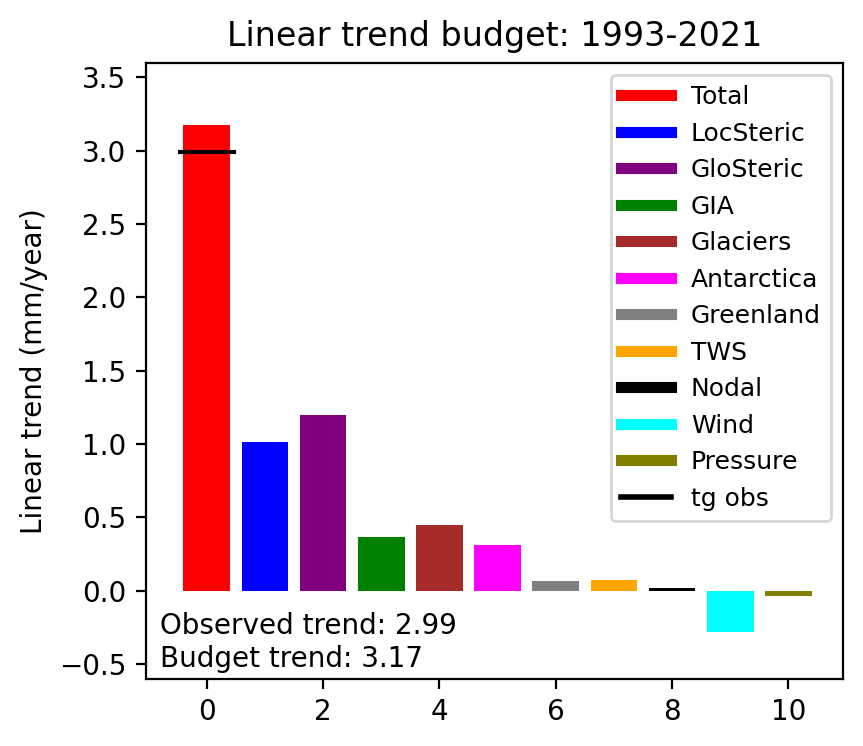

In [6]:
fig, ax = plot_trend_budget(budget_df)

### Modify name

In [7]:
budget_df2 = budget_df.rename(columns={'LocSteric' : 'Regional Steric', 
                                      'GloSteric' : 'Global Steric'})

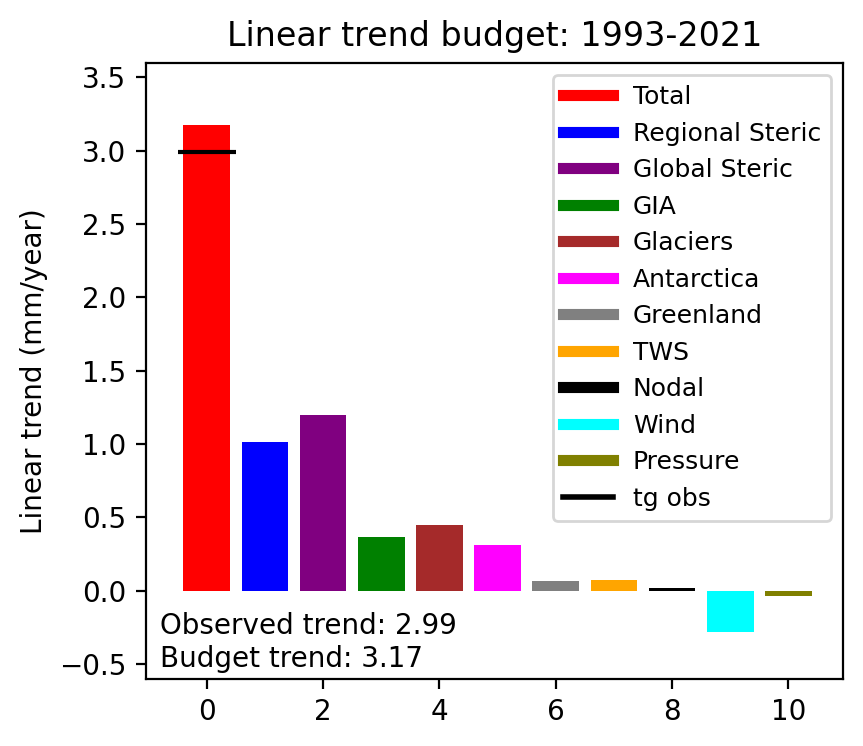

In [10]:
fig, ax = plot_trend_budget(budget_df2)

fig.savefig(path_outputs+'SimplerBarChart1.png', bbox_inches='tight', dpi=250)

### Simplify

In [12]:
budget_simpler_df = budget_df.copy()

In [13]:
budget_simpler_df['Thermal expansion'] = budget_simpler_df.loc[:,['LocSteric','GloSteric']].sum(axis=1)
budget_simpler_df['Other'] = budget_simpler_df.loc[:,['GIA','TWS','Nodal','Wind','Pressure']].sum(axis=1)

budget_simpler_df.drop(columns=['LocSteric', 'GloSteric', 'GIA', 'TWS','Nodal','Wind','Pressure'])

budget_simpler_df = budget_simpler_df[['Total', 'Thermal expansion', 'Glaciers', 'Antarctica', 'Greenland', 'Other', 'Obs']]

In [14]:
def plot_trend_budget_simpler(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    colors = ['red', 'blue', 'orange', 'green', 'grey', 'magenta']

    ind = np.arange(len(slmean_df.columns) - 1 )
    
    name_col = list(slmean_df.columns[:-1])
    name_col[1] = 'Thermal \n expansion'
    print(name_col)
    
    ax.set_title(f'Processes contributing to sea level rise: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(name_col, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.text(0.6, lin_trend[-1], 'Tide gauge observations', va='center')
    ax.set_ylabel('Linear trend (mm/year)')
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=35) #, ha='right')
    
    return fig, ax

['Total', 'Thermal \n expansion', 'Glaciers', 'Antarctica', 'Greenland', 'Other']


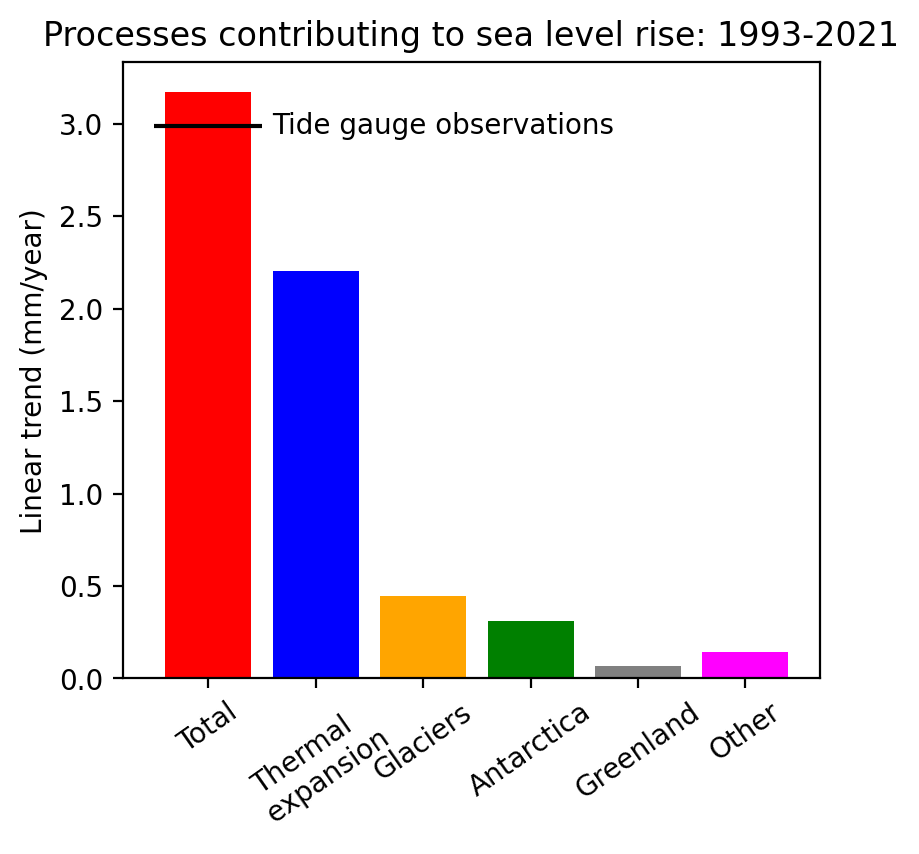

In [15]:
fig, ax = plot_trend_budget_simpler(budget_simpler_df)

fig.savefig(path_outputs+'SimplerBarChart2.png', bbox_inches='tight', dpi=250)

In [23]:
def plot_trend_budget_simpler_dutch(slmean_df):
    
    fig, ax = plt.subplots(1, 1, figsize=(4.5,4))
    
    lin_trend = np.polyfit(slmean_df.index, 
                           slmean_df * 10, 1)[0,:]  # Convert from cm to mm
    
    colors = ['red', 'blue', 'orange', 'green', 'grey', 'magenta']

    ind = np.arange(len(slmean_df.columns) - 1 )
    
    # Translate column names to Dutch
    slmean_df = slmean_df.rename(columns={'Total':'Totaal', 
                                          'Thermal expansion':'Opwarming en uitzetting', 
                                          'Glaciers':'Gletsjers',  
                                          'Greenland':'Groenland',
                                          'Other':'Overig'})
    
    name_col = list(slmean_df.columns[:-1])
    name_col[1] = 'Opwarming \n en uitzetting'
    print(name_col)
    
    ax.set_title(f'Processes contributing to sea level rise: {slmean_df.index[0]}-{slmean_df.index[-1]}')
    ax.bar(name_col, lin_trend[:-1], color=colors)
    ax.hlines(y=lin_trend[-1], xmin=-0.5, xmax=0.5, color='black')
    ax.text(0.6, lin_trend[-1], 'Getijdestations', va='center')
    ax.set_ylabel('Zeespiegelstijging (mm / jaar)')
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40) #, ha='right')
    
    return fig, ax

['Totaal', 'Opwarming \n en uitzetting', 'Gletsjers', 'Antarctica', 'Groenland', 'Overig']


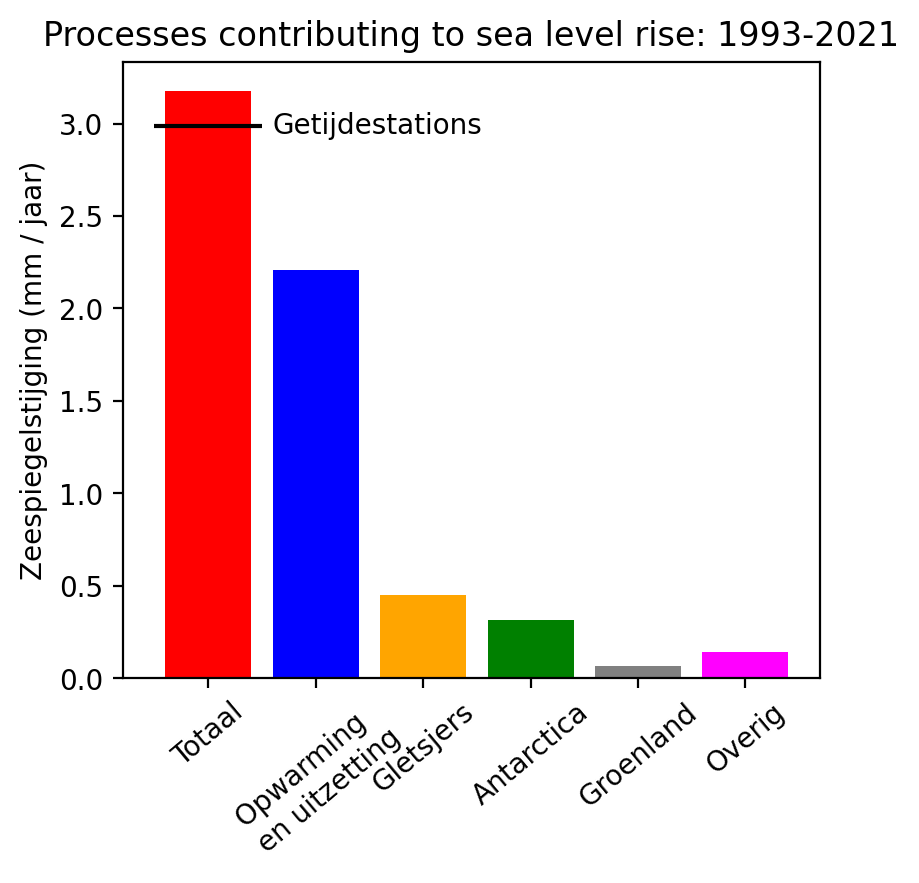

In [24]:
fig, ax = plot_trend_budget_simpler_dutch(budget_simpler_df)

fig.savefig(path_outputs+'SimplerBarChart2_dutch.png', bbox_inches='tight', dpi=250)